In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주파수 응답과 위상 지연 데이터를 함수로 정의
def gain(f):
    if f == 1000:
        return 200
    elif f == 2000:
        return 220
    # 고조파가 추가될 경우 여기서 이득을 정의할 수 있다.
    return 1

def phase_lag(f):
    if f == 1000:
        return 0
    elif f == 2000:
        return 20 * (np.pi / 180) # degrees to radians
    # 고조파가 추가될 경우 여기서 위상 지연을 정의할 수 있다.
    return 0

# 사각파 생성
def square_wave(t, f):
    return (4 / np.pi) * np.sum([np.sin(2*np.pi*(2*n-1) * f * t) / (2*n-1) for n in range(1, 10)], axis=0)

# 시간 설정
fs = 100000 # 샘플링 주파수
T = 0.002   # 신호 지속 시간
t = np.linspace(0, T, int(fs*T), endpoint=False)

# 입력 사각파 생성
f1 = 1000 # 기본 주파수
input_signal = square_wave(t,f1)

# 출력 신호 계산
output_signal = np.zeros_like(t)
for harmonic in [1, 2]: # 1000Hz와 2000Hz 성분을 고려
    f_h = harmonic * f1
    g = gain(f_h)
    phi = phase_lag(f_h)
    output_signal += g * (4 / np.pi) * np.sin(2 * np.pi * f_h * t + phi) / harmonic

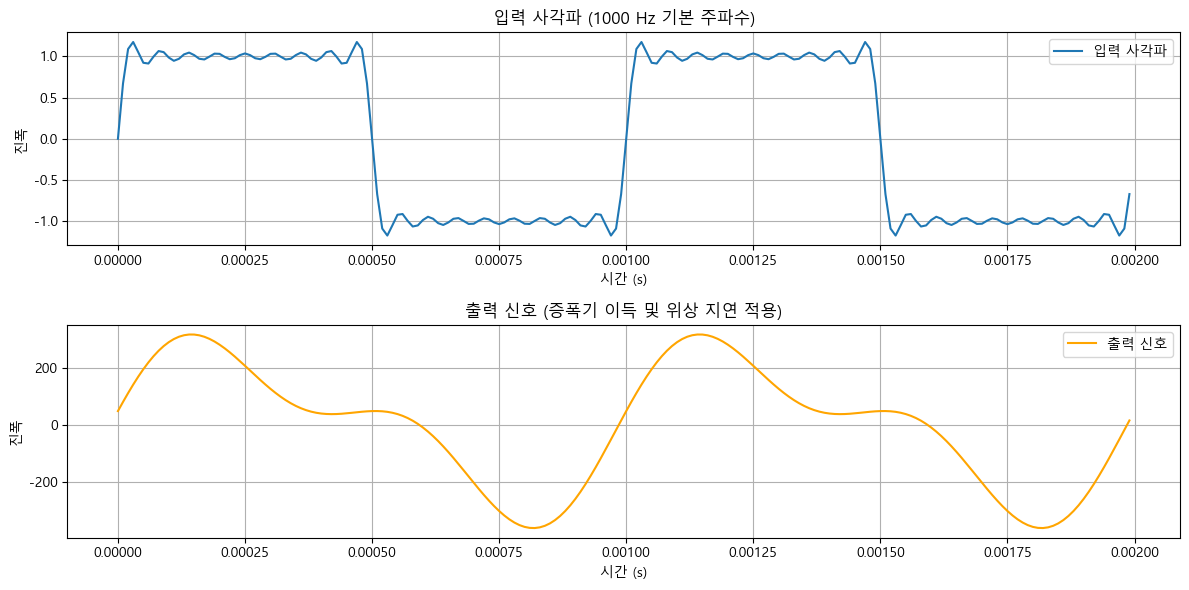

In [19]:
# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(t, input_signal, label='입력 사각파')
plt.title('입력 사각파 (1000 Hz 기본 주파수)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, output_signal, label='출력 신호', color='orange')
plt.title('출력 신호 (증폭기 이득 및 위상 지연 적용)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
t2 = np.linspace(0, 10, 5, endpoint=False)
a = np.zeros_like(t2)
a

array([0., 0., 0., 0., 0.])

위 코드를 통해 `np.zeros_like()`함수는 주어진 범위만큼 0으로 채워주는 역할을 한다는 것을 알 수 있었다.

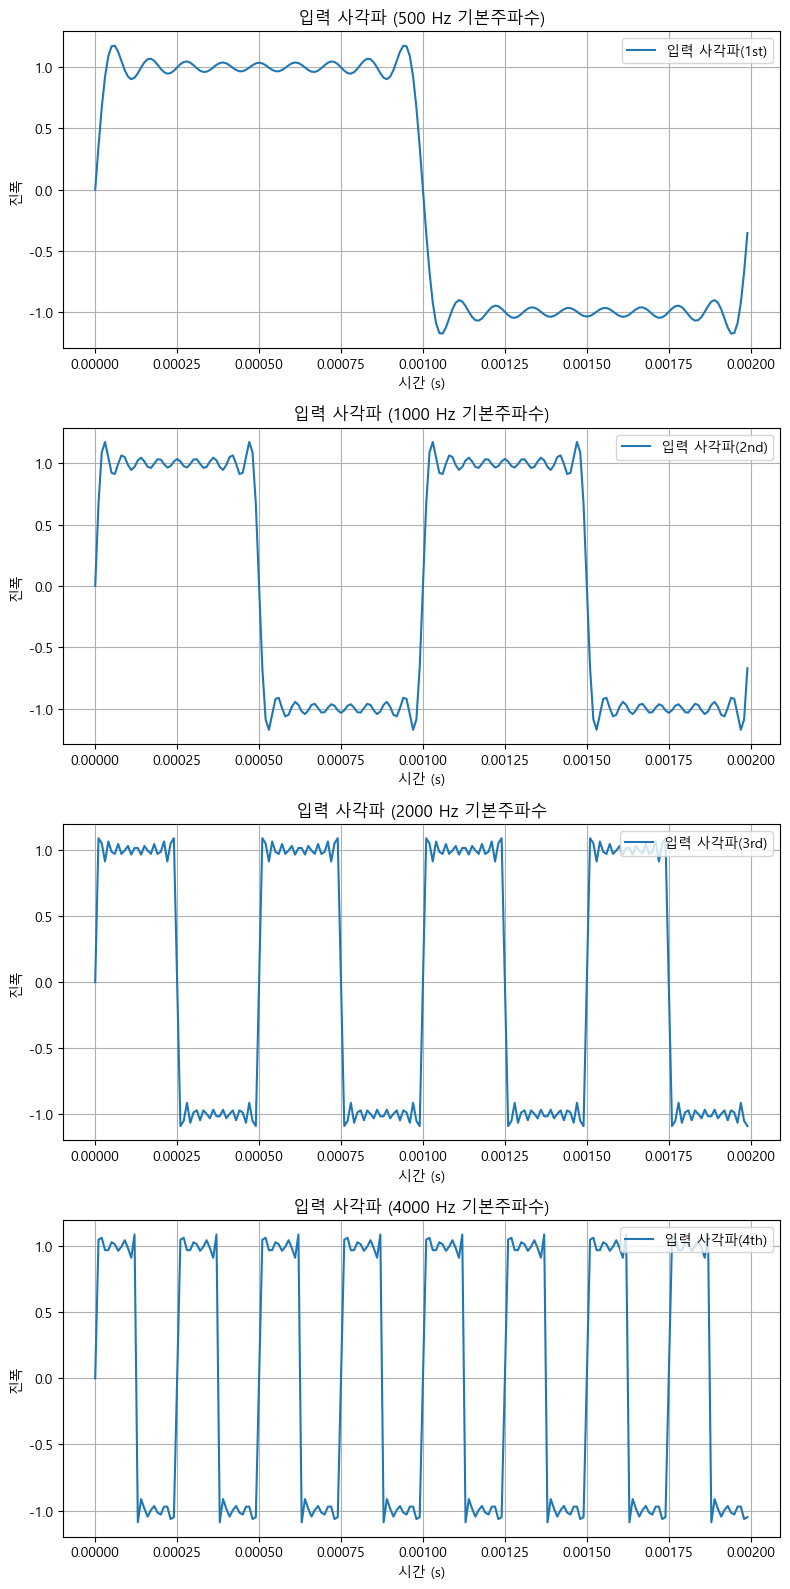

In [37]:
plt.figure(figsize=(8, 16))

input_signal1 = square_wave(t,500)
plt.subplot(4,1,1)
plt.plot(t, input_signal1, label='입력 사각파(1st)')
plt.title('입력 사각파 (500 Hz 기본주파수)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

input_signal2 = square_wave(t,1000)
plt.subplot(4,1,2)
plt.plot(t, input_signal2, label='입력 사각파(2nd)')
plt.title('입력 사각파 (1000 Hz 기본주파수)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

input_signal3 = square_wave(t, 2000)
plt.subplot(4,1,3)
plt.plot(t, input_signal3, label='입력 사각파(3rd)')
plt.title('입력 사각파 (2000 Hz 기본주파수')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend(loc='upper right')

input_signal4 = square_wave(t, 4000)
plt.subplot(4,1,4)
plt.plot(t, input_signal4, label='입력 사각파(4th)')
plt.title('입력 사각파 (4000 Hz 기본주파수)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

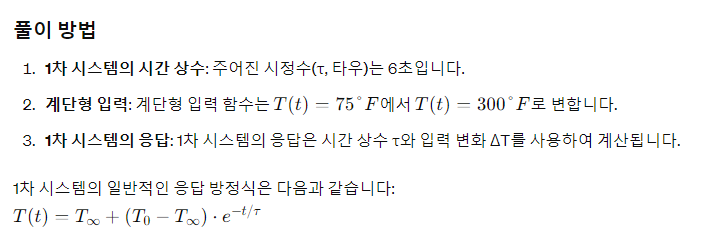

In [58]:
import numpy as np

# 초기조건 및 상수
T_0 = 75 # T_0: 초기조건
T_inf = 300 # T_inf: 나중조건 (계단형 입력 함수는 75에서 300으로 변한다)
tau = 6 # tau: 시정수
t = 10 # t: 경과시간

# 1차 시스템의 응답 계산
T_t = T_inf + (T_0 - T_inf)*np.exp(-t/tau)
print(f"과정이 시작된 후 10초가 지났을 때의 온도: {T_t:.2f} °F")

과정이 시작된 후 10초가 지났을 때의 온도: 257.50 °F


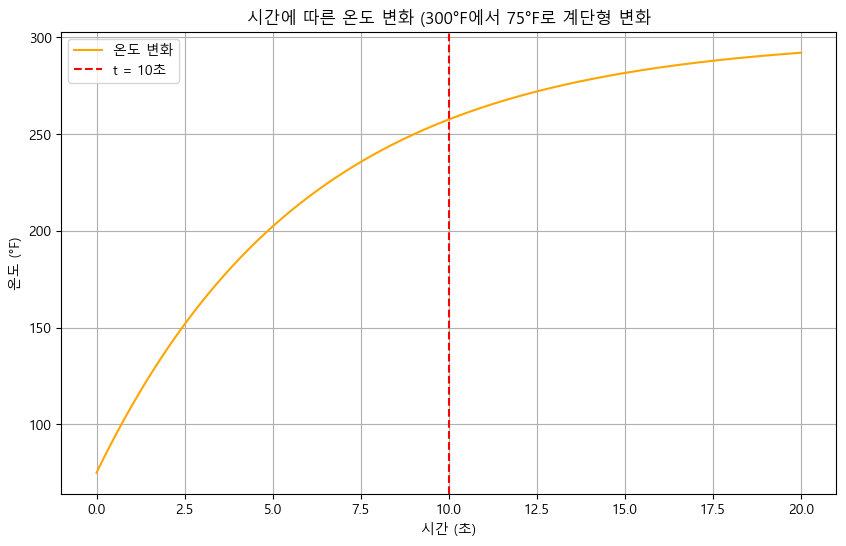

In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 초기 조건 및 상수
T0 = 75 # 초기 온도 (°F)
T_inf = 300 # 최종 온도 (°F)
tau = 6 # 시정수 (초)
t_end = 20 # 관찰 시간의 끝 (초)

# 시간 배열 생성
t = np.linspace(0, t_end, 1000)

# 1차 시스템의 응답 계산
T_t = T_inf + (T_0 - T_inf)*np.exp(-t/tau)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, T_t, label='온도 변화', color='orange')
plt.axvline(x=10, color='r', linestyle='--', label='t = 10초')
plt.title('시간에 따른 온도 변화 (300°F에서 75°F로 계단형 변화')
plt.xlabel('시간 (초)')
plt.ylabel('온도 (°F)')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
# 예제3
import numpy as np

P_inf = 75
P_A = 300
t = 10
tau = 6

# 1차 시스템의 응답 계산
P = 75 + (P_A - P_inf) * np.exp(-t/tau)
print(f"과정이 시작된 후 10초가 지났을 때의 온도: {P:.2f} °F")

과정이 시작된 후 10초가 지났을 때의 온도: 117.50 °F


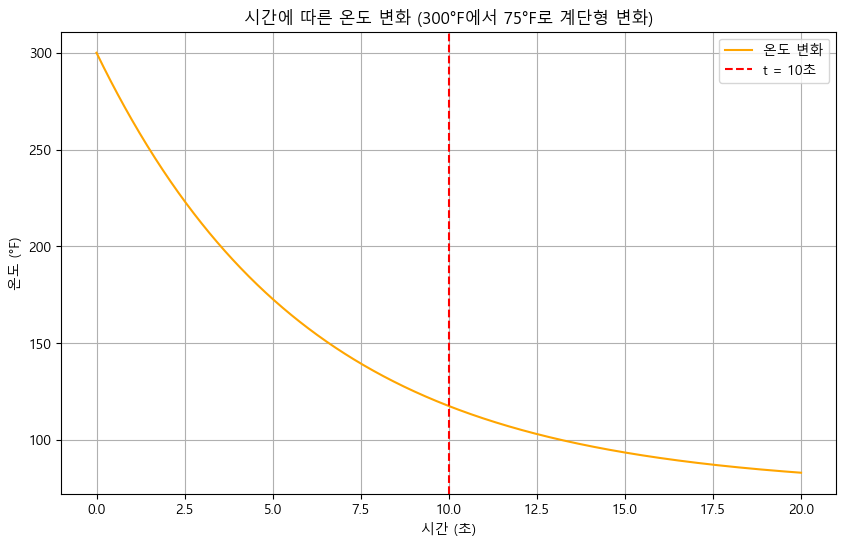

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건 및 상수
P_A = 300  # 초기 온도 (°F)
P_inf = 75  # 최종 온도 (°F)
tau = 6  # 시정수 (초)
t_target = 10  # 관찰 시간의 끝 (초)

# 시간 배열 생성
t = np.linspace(0, t_target*2, 1000)

# 1차 시스템의 응답 계산
P = P_inf + (P_A - P_inf) * np.exp(-t / tau)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, P, label='온도 변화', color='orange')
plt.axvline(x=10, color='r', linestyle='--', label='t = 10초')
plt.title('시간에 따른 온도 변화 (300°F에서 75°F로 계단형 변화)')
plt.xlabel('시간 (초)')
plt.ylabel('온도 (°F)')
plt.grid(True)
plt.legend()
plt.show()


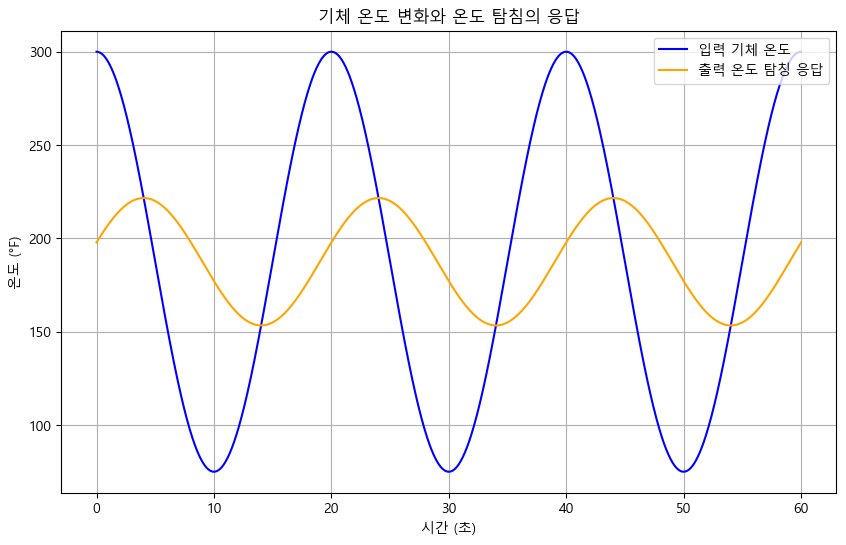

In [74]:
# 예제4
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 초기 조건 및 상수
T_min = 75
T_max = 3000
tau = 10
T0 = 187.5
A = 112.5
T_period = 20
omega = 2 * np.pi / T_period

t = np.linspace(0, 60, 1000)

T_in = T0 + A * np.cos(omega * t)

T_out = T0 + A / np.sqrt(1 + (omega * tau)**2) * np.cos(omega*t - np.arctan(omega * tau))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, T_in, label='입력 기체 온도', color='blue')
plt.plot(t, T_out, label='출력 온도 탐칭 응답', color='orange')
plt.title('기체 온도 변화와 온도 탐침의 응답')
plt.xlabel('시간 (초)')
plt.ylabel('온도 (°F)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

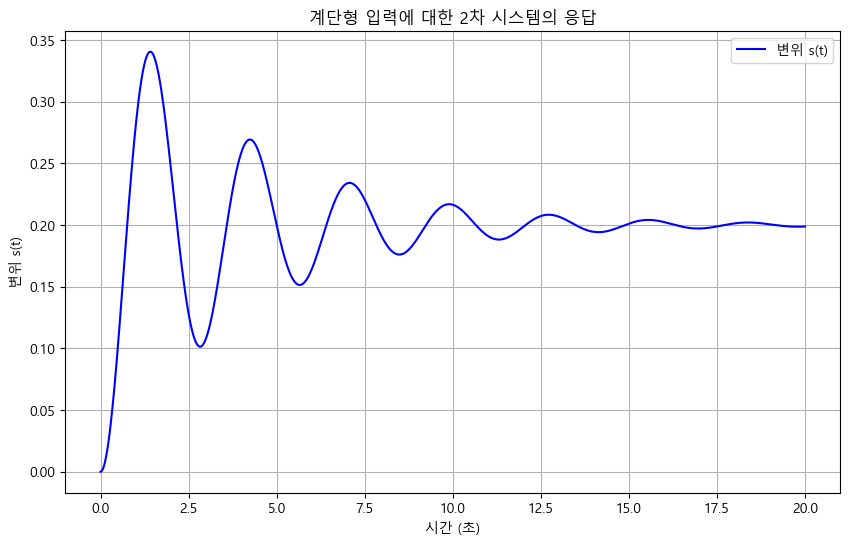

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건 및 상수
m = 1  # 질량 (kg)
gc = 1  # 단위 변환 상수
k = 5  # 스프링 상수
zeta = 0.5  # 감쇠 계수
F0 = 1  # 외부 힘
s0 = 0  # 초기 변위
v0 = 0  # 초기 속도

# 감쇠 고유 진동수 계산
omega_nd = np.sqrt((k * gc / m) - (zeta * gc / (2 * m))**2)

# 시간 배열 생성
t = np.linspace(0, 20, 1000)

# 상수 계산 (초기 조건을 이용하여)
A = s0 - F0 / k
B = (v0 + (zeta * gc / (2 * m)) * A) / omega_nd

# 운동 방정식의 해
s = np.exp(-(zeta * gc / (2 * m)) * t) * (A * np.cos(omega_nd * t) + B * np.sin(omega_nd * t)) + F0 / k

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='변위 s(t)', color='blue')
plt.title('계단형 입력에 대한 2차 시스템의 응답')
plt.xlabel('시간 (초)')
plt.ylabel('변위 s(t)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\js\AppData\Local\Temp\ipykernel_13696\1925008100.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  (xi / np.sqrt(1 - xi**2)) * np.sin(omega_nd * t) + np.cos(omega_nd * t)
C:\Users\js\AppData\Local\Temp\ipykernel_13696\1925008100.py:26: RuntimeWarning: invalid value encountered in multiply
  (xi / np.sqrt(1 - xi**2)) * np.sin(omega_nd * t) + np.cos(omega_nd * t)
C:\Users\js\AppData\Local\Temp\ipykernel_13696\1925008100.py:24: RuntimeWarning: invalid value encountered in sqrt
  omega_nd = omega_n * np.sqrt(1 - xi**2)
C:\Users\js\AppData\Local\Temp\ipykernel_13696\1925008100.py:26: RuntimeWarning: invalid value encountered in sqrt
  (xi / np.sqrt(1 - xi**2)) * np.sin(omega_nd * t) + np.cos(omega_nd * t)


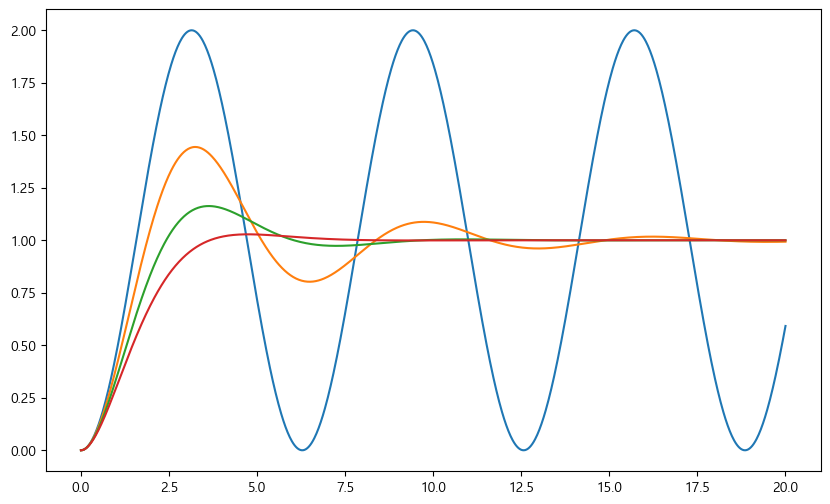

In [79]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 초기 조건 및 상수
m = 1  # 질량 (kg)
gc = 1  # 단위 변환 상수
k = 1  # 스프링 상수
F0 = 1  # 외부 힘
tau = 10  # 시정수 (초)
omega_n = np.sqrt(k * gc / m)  # 비감쇠 고유 진동수

# 다양한 감쇠비
xis = [0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5]
t = np.linspace(0, 20, 1000)
omega_nt = omega_n * t

# 시각화
plt.figure(figsize=(10, 6))

for xi in xis:
    omega_nd = omega_n * np.sqrt(1 - xi**2)
    P = 1 - np.exp(-xi * omega_n * t) * (
        (xi / np.sqrt(1 - xi**2)) * np.sin(omega_nd * t) + np.cos(omega_nd * t)
    )
    Ps = 1
    P_norm = P / Ps
    plt.plot(omega_nt, P_norm, label=f'ξ = {xi}')




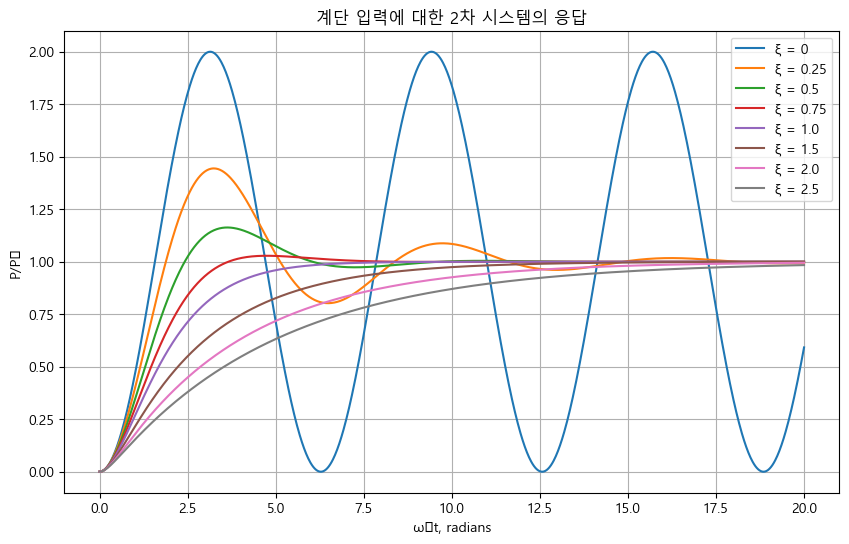

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 초기 조건 및 상수
m = 1  # 질량 (kg)
gc = 1  # 단위 변환 상수
k = 1  # 스프링 상수
F0 = 1  # 외부 힘
omega_n = np.sqrt(k * gc / m)  # 비감쇠 고유 진동수

# 다양한 감쇠비
xis = [0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5]
t = np.linspace(0, 20, 1000)
omega_nt = omega_n * t

# 시각화
plt.figure(figsize=(10, 6))

for xi in xis:
    if xi < 1.0:
        omega_nd = omega_n * np.sqrt(1 - xi**2)
        P = 1 - np.exp(-xi * omega_n * t) * (
            (xi / np.sqrt(1 - xi**2)) * np.sin(omega_nd * t) + np.cos(omega_nd * t)
        )
    elif xi == 1.0:
        P = 1 - np.exp(-omega_n * t) * (omega_n * t + 1)
    else:
        omega_nd = omega_n * np.sqrt(xi**2 - 1)
        P = 1 - np.exp(-xi * omega_n * t) * (
            (xi / np.sqrt(xi**2 - 1)) * np.sinh(omega_nd * t) + np.cosh(omega_nd * t)
        )
    Ps = 1
    P_norm = P / Ps
    plt.plot(omega_nt, P_norm, label=f'ξ = {xi}')

plt.title('계단 입력에 대한 2차 시스템의 응답')
plt.xlabel('ωₙt, radians')
plt.ylabel('P/Pₛ')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
# 예제 5
import numpy as np

# 주어진 상수
D = 12e-3 # D: 진동한 직경(m)
t = 1.75e-3 # t: 진동판 두께(m)
xi = 0.025  # xi: 감쇠비율
rho = 7850  # rho: 철의 밀도 (kg/m^3)
E = 210e9   # Pa: 철의 탄성 계수

# 진동판의 부피
volume = np.pi * (D/2)**2 * t

# 진동판의 질량
mass = rho * volume

# 스프링 상수 (단순화된 모델로 접근)
k = (E * t**3) / (12 * (1 - 0.3**2) * (D/2) ** 2) # 0.3은 철의 포아송 비율

# 고유 진동수 계산
omega_n = np.sqrt(k / mass)

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2 * np.pi)

print(f"변환기의 고유 진동수는 약 {f_n:.2f} Hz 입니다.")

변환기의 고유 진동수는 약 6831.94 Hz 입니다.


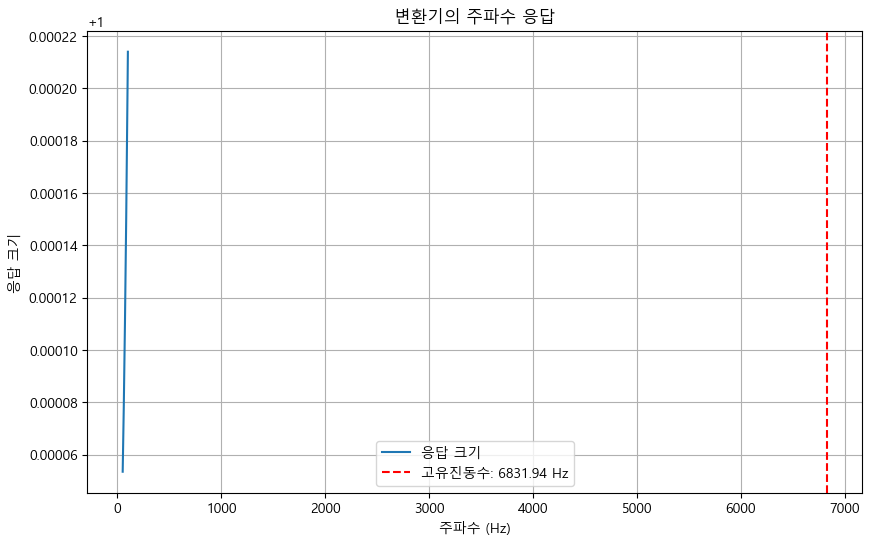

변환기의 고유진동수는 약 6831.94 Hz입니다.


In [21]:
# 주파수 범위에서 진동판의 응답을 그래프로 표시하면 다음과 같다.
# 아래코드는 변환기의 고유진동수와 감쇠비율에 따른 응답을 시각화한 코드이다.

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주어진 상수
D = 12e-3 #진동판의 직경(m)
t = 1.75e-3 # 진동판 두께(m)
xi = 0.025 # 감쇠 비율
rho = 7850 # 철의 밀도
E = 210e9 # 철의 탄성 계수(Pa)

# 진동판의 질량
mass = rho * volume

# 스프링 상수 (단순화된 모델로 접근)
k = (E * t**3) / (12 * (1 - 0.3**2) * (D/2) ** 2) # 0.3은 철의 포아송 비율

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2* np.pi)

# 측정 주파수 범위 (rpm 에서 Hz로 변환)
f_min = 3000/60
f_max = 6000/60

f_range = np.linspace(f_min, f_max, 1000)

# 응답 계산
H = 1/ np.sqrt((1 - (f_range / f_n)**2)**2 + (2 * xi * f_range / f_n) ** 2)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(f_range, H, label='응답 크기')
plt.axvline(f_n, color='r', linestyle='--', label=f'고유진동수: {f_n:.2f} Hz')
plt.title('변환기의 주파수 응답')
plt.xlabel('주파수 (Hz)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()

print(f"변환기의 고유진동수는 약 {f_n:.2f} Hz입니다.")

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 상수
D = 12e-3 # 진동판 직경 (m)
t = 1.75e-3 #진동판 두께 (m)
xi = 0.025 #감쇠 비율
rho = 7850 #철의 밀도 (kg/m^3)
E = 210e9 #철의 탄성 계수 (Pa)

# 진동판의 부피
volume = np.pi * (D/2)**2 * t

# 진동판의 질량
mass = rho * volume

# 스프링 상수
k = (E * t**3) / (12 * (1 - 0.3**2) * (D / 2)**2) # 0.3은 철의 포아송 비율

# 고유 진동수 계산
omega_n = np.sqrt(k/mass)

# 고유 진동수 (Hz)로 변환
f_n = omega_n / (2 * np.pi)
print(f"변환기의 고유 진동수는 약 {f_n/1e3:.2f} kHz입니다.")

# 엔진의 진동수 (rad/s)
Omega_max = 6000 * (2 * np.pi) / 60
Omega_min = 3000 * (2 * np.pi) / 60

# 주파수 응답 계산
Omega_ratio_max = Omega_max / omega_n
Omega_ratio_min = Omega_min / omega_n

# 응답 크기 계산
Pd_Ps_max = 1 / np.sqrt((1 - Omega_ratio_max**2)**2 + (2 * xi * Omega_ratio_max)**2)
Pd_Ps_min = 1 / np.sqrt((1 - Omega_ratio_min**2)**2 + (2 * xi * Omega_ratio_min)**2)

print(f"최대 엔진 진동수에서의 응답 비율: {Pd_Ps_max:.2f}")
print(f"최소 엔진 진동수에서의 응답 비율: {Pd_Ps_min:.2f}")

# 주파수 응답 시각화
f_range = np.linspace(0, f_n * 2 / (2* np.pi), 1000)
omega_range = f_range * 2 * np.pi
# H = 1 / np.sqrt(()**2 + ()**2)
H = 1 / np.sqrt((1-(omega_range/omega_n))**2 + (2 * xi * omega_range / omega_n)**2)

변환기의 고유 진동수는 약 6.83 kHz입니다.
최대 엔진 진동수에서의 응답 비율: 1.00
최소 엔진 진동수에서의 응답 비율: 1.00


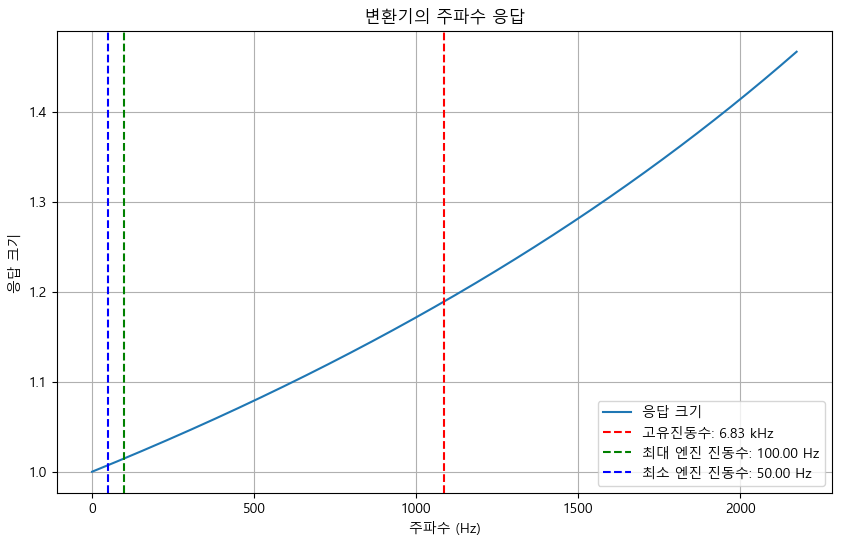

In [27]:
plt.figure(figsize=(10,6))
plt.plot(f_range, H, label='응답 크기')
plt.axvline(f_n / (2*np.pi), color='r', linestyle='--', label=f'고유진동수: {f_n / 1e3:.2f} kHz')
plt.axvline(Omega_max / (2*np.pi), color='g', linestyle='--', label=f'최대 엔진 진동수: {Omega_max / (2*np.pi):.2f} Hz')
plt.axvline(Omega_min / (2*np.pi), color='b', linestyle='--', label=f'최소 엔진 진동수: {Omega_min/ (2*np.pi):.2f} Hz')
plt.title('변환기의 주파수 응답')
plt.xlabel('주파수 (Hz)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()

입력 주파수 10 rad/s에서의 응답: 10.48 m
입력 주파수 30 rad/s에서의 응답: 10.49 m
입력 주파수 50 rad/s에서의 응답: 4.59 m


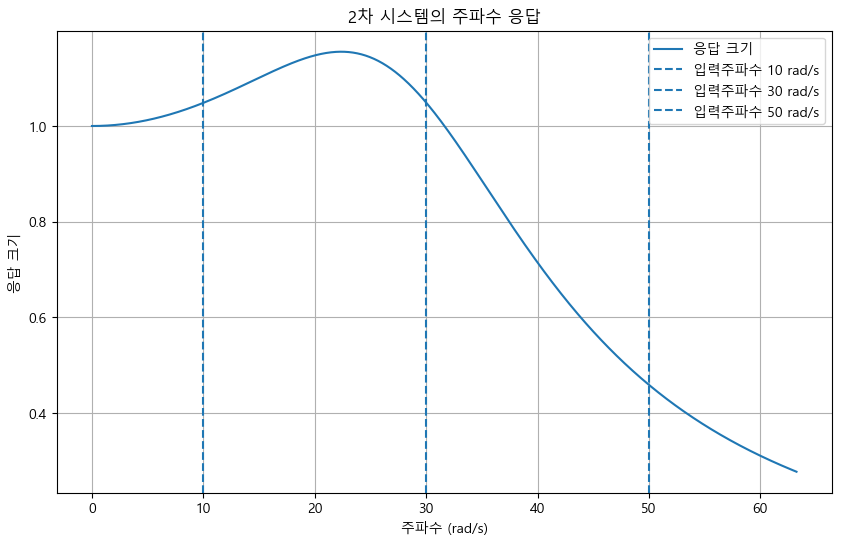

In [28]:
# 예제6
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='Malgun Gothic')

# 주어진 상수
m = 1 # 질량(kg)
k = 1000 # 스프링 상수(N/m)
zeta = 31.6 # 감쇠계수(N·s/m)
A = 10 #외력의 진폭 (N)

# 고유 진동수 계산
omega_n = np.sqrt(k/m)

# 감쇠비 계산
xi = zeta / (2*np.sqrt(k*m))

# 입력 주파수
Omegas = [10, 30, 50] # rad/s

# 응답 계산
responses = {}
for Omega in Omegas:
    H_Omega = 1/ np.sqrt((1 - (Omega/omega_n)**2)**2 + (2 * xi * Omega / omega_n)**2)
    x_Omega = H_Omega * A
    responses[Omega] = x_Omega

# 결과 출력
for Omega, response in responses.items():
    print(f"입력 주파수 {Omega} rad/s에서의 응답: {response:.2f} m")

# 주파수 응답 시각화
f_range = np.linspace(0, 2 * omega_n, 1000)
omega_range = f_range
H = 1 / np.sqrt((1 - (omega_range / omega_n)**2)**2 + (2 * xi * omega_range / omega_n)**2)

plt.figure(figsize=(10, 6))
plt.plot(omega_range, H, label='응답 크기')
for Omega in Omegas:
    plt.axvline(Omega, linestyle='--', label=f'입력주파수 {Omega} rad/s')
plt.title('2차 시스템의 주파수 응답')
plt.xlabel('주파수 (rad/s)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
#예제7
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주어진 상수
f = 5e3 # 주파수(Hz)
omega = 2 * np.pi * f #각주파수(rad/s)
V_in = 1  # 입력전압
R = 1000  # 저항
C = 1e-9  # 커패티서(F)

# 임피던스 게산
Z_R = R
Z_C = 1 / (1j * omega * C)
Z_total = Z_R + Z_C

# 전압 분배 계산
V_R = V_in * (Z_R / Z_total)
V_C = V_in * (Z_C / Z_total)

# 크기와 위상 계산
V_R_mag = np.abs(V_R)
V_C_mag = np.abs(V_C)
V_R_phase = np.angle(V_R, deg=True)
V_C_phase = np.angle(V_C, deg=True)

print(f"저항에 걸리는 전압 크기: {V_R_mag: .2f} V")
print(f"저항에 걸리는 전압 위상: {V_R_phase: .2f} degrees")
print(f"커패시터에 걸리는 전압 크기: {V_C_mag:.2f} V")
print(f"커패시터에 걸리는 전압 위상: {V_C_phase:.2f} degrees")

저항에 걸리는 전압 크기:  0.03 V
저항에 걸리는 전압 위상:  88.20 degrees
커패시터에 걸리는 전압 크기: 1.00 V
커패시터에 걸리는 전압 위상: -1.80 degrees


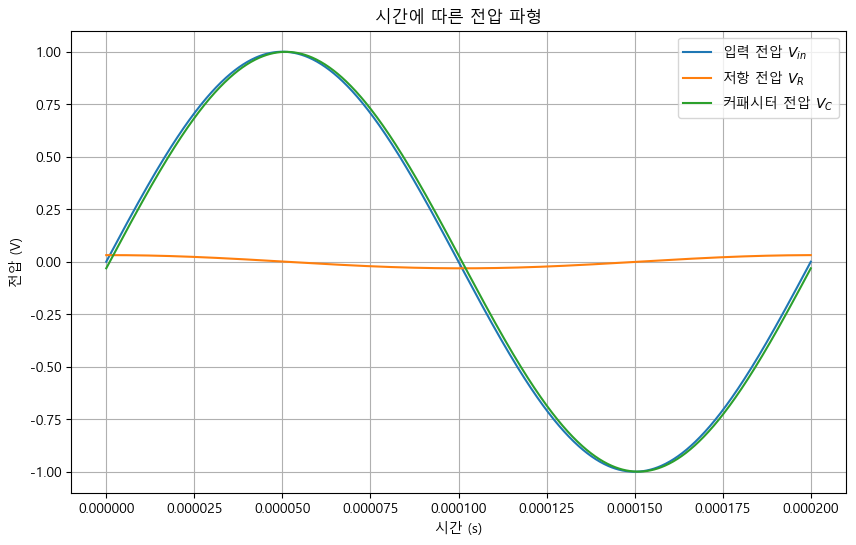

In [33]:
# 예제7 시각화
t = np.linspace(0, 1/f, 1000)
V_in_t = V_in * np.sin(omega * t)
V_R_t = V_R_mag * np.sin(omega * t + np.deg2rad(V_R_phase))
V_C_t = V_C_mag * np.sin(omega * t + np.deg2rad(V_C_phase))

plt.figure(figsize=(10, 6))
plt.plot(t, V_in_t, label='입력 전압 $V_{in}$')
plt.plot(t, V_R_t, label='저항 전압 $V_R$')
plt.plot(t, V_C_t, label='커패시터 전압 $V_C$')
plt.title('시간에 따른 전압 파형')
plt.xlabel('시간 (s)')
plt.ylabel('전압 (V)')
plt.legend()
plt.grid(True)
plt.show()